# Global Analysis
To start our analysis, we have a global overview of the rhymes in each corpus. In this section we look at the frequency and normalized frequency of the tokens and their rhymes for the entire text. This includes:
- Repeated words
- Occurrences of any rhymes anywhere in the text

In [1]:
from IPython.utils.io import capture_output

with capture_output():
    %run 1_Set_Up.ipynb
    %run functions.ipynb

### Dr Seuss Globalized Stats

In [2]:
import pandas as pd
from collections import Counter
import pronouncing

# import warnings
# warnings.filterwarnings('ignore')

seuss_df = pd.DataFrame(columns=['Title', 'String', 'Occurrences', 'Rhymes', 'Occurrences_Normalized', 'Rhymes_Normalized'])

for x in range(1, len(seuss_files)):
    strings = seuss_corpus_tokens[x]
    string_counts = Counter(strings)  # count occurrences of each word
    
    # Step 3: Determine rhyming counts
    unique_strings = list(string_counts.keys())  # create unique list of words
    rhymes_dict = {}
    
    for word in unique_strings:
        any_rhymes = set(pronouncing.rhymes(word))  # any words in the world that rhyme with the current word
        test_rhymes = set(unique_strings).intersection(any_rhymes)  # Filter to words in the original list
        rhymes_dict[word] = len(test_rhymes)  # Count of rhymes for the current word
    
    # Step 4: Create the DataFrame
    data = {
        "Title": [seuss_files[x]] * len(unique_strings),  # Repeat the title for each word
        "String": unique_strings,
        "Occurrences": [string_counts[word] for word in unique_strings],
        "Rhymes": [rhymes_dict[word] for word in unique_strings],
    }
    
    temp_df = pd.DataFrame(data)
    temp_df = temp_df.sort_values(by="Rhymes", ascending=False).reset_index(drop=True)
    
    temp_df['Occurrences_Normalized'] = temp_df['Occurrences'] / temp_df['Occurrences'].sum()
    temp_df['Rhymes_Normalized'] = temp_df['Rhymes'] / temp_df['Rhymes'].sum()

    # Append the data frame
    seuss_df = pd.concat([seuss_df, temp_df], ignore_index=True)


In [3]:
seuss_df

,Title,String,Occurrences,Rhymes,Occurrences_Normalized,Rhymes_Normalized
0,cat-in-the-hat-comes-back.txt,v,3,16,0.001813,0.016789
1,cat-in-the-hat-comes-back.txt,z,6,16,0.003625,0.016789
2,cat-in-the-hat-comes-back.txt,p,2,16,0.001208,0.016789
3,cat-in-the-hat-comes-back.txt,me,12,16,0.007251,0.016789
4,cat-in-the-hat-comes-back.txt,we,19,16,0.011480,0.016789
...,...,...,...,...,...,...
6164,yertle-the-turtle.txt,beg,1,0,0.001048,0.000000
6165,yertle-the-turtle.txt,pardon,1,0,0.001048,0.000000
6166,yertle-the-turtle.txt,ive,1,0,0.001048,0.000000
6167,yertle-the-turtle.txt,pains,1,0,0.001048,0.000000


### Comparison Corpus Globalized Stats

In [4]:
comp_df = pd.DataFrame(columns=['Title', 'String', 'Occurrences', 'Rhymes', 'Occurrences_Normalized', 'Rhymes_Normalized'])

for x in range(1, len(comparison_files)):
    strings = comp_corpus_tokens[x]
    string_counts = Counter(strings)  # count occurrences of each word
    
    # Step 3: Determine rhyming counts
    unique_strings = list(string_counts.keys())  # create unique list of words
    rhymes_dict = {}
    
    for word in unique_strings:
        any_rhymes = set(pronouncing.rhymes(word))  # any words in the world that rhyme with the current word
        test_rhymes = set(unique_strings).intersection(any_rhymes)  # Filter to words in the original list
        rhymes_dict[word] = len(test_rhymes)  # Count of rhymes for the current word
    
    # Step 4: Create the DataFrame
    data = {
        "Title": [comparison_files[x]] * len(unique_strings),  # Repeat the title for each word
        "String": unique_strings,
        "Occurrences": [string_counts[word] for word in unique_strings],
        "Rhymes": [rhymes_dict[word] for word in unique_strings],
    }
    
    temp_df = pd.DataFrame(data)
    temp_df = temp_df.sort_values(by="Rhymes", ascending=False).reset_index(drop=True)
    
    temp_df['Occurrences_Normalized'] = temp_df['Occurrences'] / temp_df['Occurrences'].sum()
    temp_df['Rhymes_Normalized'] = temp_df['Rhymes'] / temp_df['Rhymes'].sum()

    # Append the data frame
    comp_df = pd.concat([comp_df, temp_df], ignore_index=True)  # Use pd.concat to combine DataFrames


In [5]:
comp_df

,Title,String,Occurrences,Rhymes,Occurrences_Normalized,Rhymes_Normalized
0,edward-lear-dong-with-luminous-nose.txt,they,7,6,0.010116,0.017341
1,edward-lear-dong-with-luminous-nose.txt,day,5,6,0.007225,0.017341
2,edward-lear-dong-with-luminous-nose.txt,gray,1,6,0.001445,0.017341
3,edward-lear-dong-with-luminous-nose.txt,away,1,6,0.001445,0.017341
4,edward-lear-dong-with-luminous-nose.txt,gay,1,6,0.001445,0.017341
...,...,...,...,...,...,...
6555,winnie-the-pooh-stuck-at-rabbits-house.txt,always,1,0,0.000687,0.000000
6556,winnie-the-pooh-stuck-at-rabbits-house.txt,something,2,0,0.001375,0.000000
6557,winnie-the-pooh-stuck-at-rabbits-house.txt,mouthful,1,0,0.000687,0.000000
6558,winnie-the-pooh-stuck-at-rabbits-house.txt,careful,1,0,0.000687,0.000000


## Display the results
### All Rhyming Words in a Single Text – Comparison of Dr. Seuss and Comparison Corpus

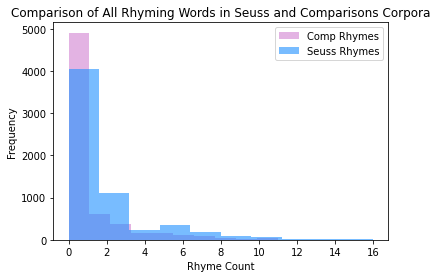

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

# Plot histograms for both datasets
plt.hist(comp_df['Rhymes'], alpha=0.8, label='Comp Rhymes', color='plum')
plt.hist(seuss_df['Rhymes'], alpha=0.6, label='Seuss Rhymes', color='dodgerblue')

# Add title, legend, and labels
plt.title('Comparison of All Rhyming Words in Seuss and Comparisons Corpora')
plt.xlabel('Rhyme Count')
plt.ylabel('Frequency')
plt.legend() 

# Show the plot
plt.show()

# Save plot as png file
plt.savefig('my_plot.png')

This histogram shows that the comparison corpus has a greater number of words with 0 rhymes compared with dr Seuss. On the other hand, Dr Seuss has a greater number of words with 1, 2, 3, 4, etc. rhymes compared with the comparison corpus. This is a good indicator that Dr. Seuss is more rhyme-y. But normalized values will be even better:

### Normalized Rhyming Words in a Single Text – Comparison of Dr. Seuss and Comparison Corpus

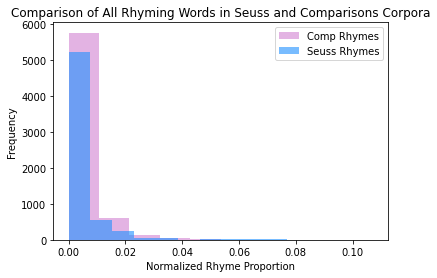

In [8]:
import matplotlib.pyplot as plt

# Plot histograms for both datasets
plt.hist(comp_df['Rhymes_Normalized'], alpha=0.8, label='Comp Rhymes', color='plum')
plt.hist(seuss_df['Rhymes_Normalized'], alpha=0.6, label='Seuss Rhymes', color='dodgerblue')

# Add title, legend, and labels
plt.title('Comparison of All Rhyming Words in Seuss and Comparisons Corpora')
plt.xlabel('Normalized Rhyme Proportion')
plt.ylabel('Frequency')
plt.legend()  # Add the legend

# Show the plot
plt.show()


We normalized, Dr Seuss has a lower frequency of tokens with fewer rhymes, and a higher frequency of words with larger normalized rhyme proportions! This is an even better indicator that he is more rhyme-y. But, a closer look (a localized analysis) will be more accurate. We explore this in the next two sections.

# Conclusion
Dr. Seuss has a higher frequency of words with a higher rhyme count and words with a higher normalized rhyme count, compared with the comparison stories. The comparison stories have a higher frequency of words with lower rhyme counts (0,1,2) and lower normalized rhyme frequencies, compared with Dr. Seuss.

So far... Dr. Seuss seems to be more rhyme-y!

---

Up Next: *__LOCALIZED__* analysis that breaks the text into smaller chunks.